In [3]:
# Usaremos la base de datos Covertype Data Set
# https://archive.ics.uci.edu/ml/datasets/Covertype

# Esta base de datos contiene información sobre tipos de bósques, capturada para
# pequeñas regiones de 30x30 metros. Los datos fueron colectados por el US Forest
# Service (USFS). Las variables independientes 'X' son cartográficas, y sus
# respectivas etiquetas 'Y' son enteros [1, 7] indicando 7 posibles clases de bosque.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento, como en los de validación y los de prueba.

# Part 1: Load dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Read data file
df = pd.read_csv('forest_cover_type.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df

,Elevation,Aspect,Slope,H dist H,V dist H,H dist R,9am,Noon,3pm,H dist F,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Forest type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:
# Look at label's distribution
df['Forest type'].value_counts() # Base de datos desbalanceada.

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Forest type, dtype: int64

Insertar Balanceo del Dataset

In [7]:
def sampling_k_elements(group,N=1000):
    if len(group)<N:
        return group
    else:
        return group.sample(N)

In [8]:
sampling_k_elements(df['Forest type'], 2747)

86864     2
81490     1
143087    2
430071    1
35283     2
         ..
150182    2
230002    2
298414    2
125702    2
286813    2
Name: Forest type, Length: 2747, dtype: int64

insertar value count para ver que el código anterior funcionó

In [9]:
df['Forest type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Forest type, dtype: int64

In [10]:
# Split training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.2)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(418328, 55)
(104582, 55)
(58102, 55)


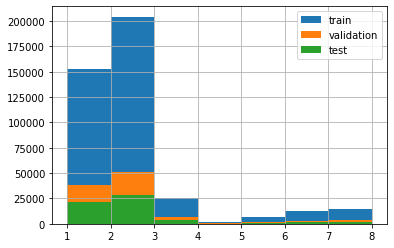

In [11]:
# Visualize distribution of splits
df_train['Forest type'].hist(bins=range(1, 9), label='train')
df_val['Forest type'].hist(bins=range(1, 9), label='validation')
df_test['Forest type'].hist(bins=range(1, 9), label='test')
plt.legend()
plt.show()

In [12]:
# Extract labels as matrices
y_train = df_train['Forest type'].to_numpy()
y_val = df_val['Forest type'].to_numpy()
y_test = df_test['Forest type'].to_numpy()
print(y_test[:10])

# And turn them into one-hot encoding format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)[:, 1:]
y_val = to_categorical(y_val, num_classes=8)[:, 1:]
y_test = to_categorical(y_test,num_classes=8)[:, 1:]

print("Y shapes")
print("y_train:", y_train.shape)
print("y_train:", y_val.shape)
print("y_test:", y_test.shape)
print(y_test[:10])

[1 2 1 2 2 1 7 1 2 2]
Y shapes
y_train: (418328, 7)
y_train: (104582, 7)
y_test: (58102, 7)
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


X shapes
x_train: (418328, 54)
x_train: (104582, 54)
x_test: (58102, 54)


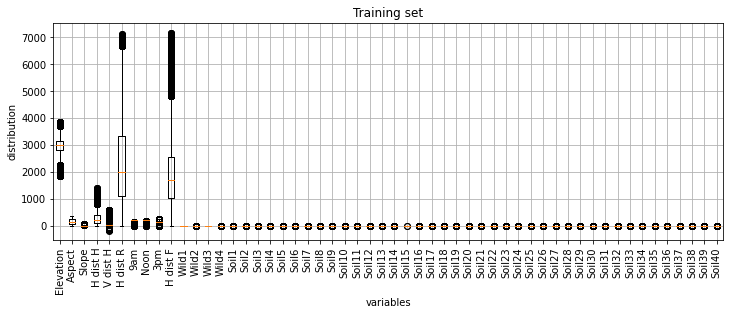

In [13]:
# Extract independent variables as matrices
x_train = df_train.to_numpy()[:, :-1]
x_val = df_val.to_numpy()[:, :-1]
x_test = df_test.to_numpy()[:, :-1]

print("X shapes")
print("x_train:", x_train.shape)
print("x_train:", x_val.shape)
print("x_test:", x_test.shape)

plt.figure(figsize=(12, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

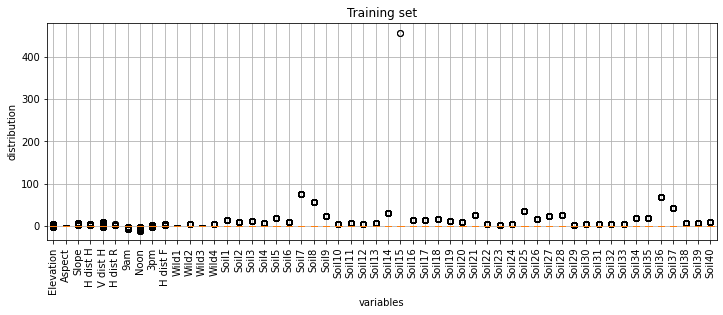

In [14]:
# Train scaler and apply it on the train set
scalerX = StandardScaler()
x_train = scalerX.fit_transform(x_train)

plt.figure(figsize=(12, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

In [15]:
# Apply trained scaler on the validation and test sets
x_val = scalerX.transform(x_val)
x_test = scalerX.transform(x_test)

# Part 2: Create DNN model and train it

In [16]:
# tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# == - ==
# La celda siguiente contiene tres modelos de redes neuronales. Comenta uno y usa otro.
# Evalua uno a la vez y reporta tus resultados.
#
# Nota que importamos layers tipo BatchNorm y Dropout, los cuales son usados en 
# distintas secciones del modelo.
# También importamos regularizadores l1 y l2, los cuales son usados como parametros
# de las capas.
#
# Nota también el uso del parametro "metrics" en la compilación del modelo.
# Este parámetro es sólo informativo, pero no se usa para optimizar el modelo.
# En el caso particular de este modelo, se indica la exactitud de la clasificación,
# sin embargo la minimización del error se hace con la función de pérdida "categorical_crossentropy"
# Puedes revisar más detalles en la documentación de Keras o tf.
#
# Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?
# Q2: ¿Por qué usamos softmax en la salida de la red?
# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento"
#     menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas y sus tamaños.
# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y sus tamaños)
#     en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2
#     para disminuir el error de generalización (validación).
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y tamaños para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación.
#     Reporta tu mejor modelo.
# =======

In [18]:
# Create a Deep Network
DNN = Sequential()

# -- Try 01 --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dense(1024, activation='relu'))
DNN.add(Dense(256, activation='relu'))
DNN.add(Dense(64, activation='relu'))
DNN.add(Dense(16, activation='relu'))
# -- ------ --

# -- Try 02 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dropout(rate=0.2))

#DNN.add(Dense(512))
#DNN.add(BatchNormalization())
#DNN.add(Activation('relu'))
#DNN.add(Dense(512, activation='relu', activity_regularizer=l1(l=3e-4)))
#DNN.add(Dense(512, activation='relu', activity_regularizer=l2(l=3e-5))) # l2 es como encerrar todos
# los pesos dentro de una esfera. 
# -- ------ --

# -- Try 03 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dense(512))
#DNN.add(BatchNormalization())
#DNN.add(Activation('relu'))
#DNN.add(Dense(256, activation='relu'))
#DNN.add(Dropout(rate=0.2))
#DNN.add(Dense(128, activation='relu', activity_regularizer=l2(l=3e-5)))
#DNN.add(Dense(64, activation='relu', activity_regularizer=l1(l=3e-6)))
# -- ------ --

# Final: useful for all three models
DNN.add(Dense(units=y_train.shape[1], activation='sigmoid'))
DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              56320     
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 336,327
Trainable params: 336,327
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
#from tensorflow.keras.optimizers import SGD
#sgd = SGD(learning_rate=0.01, momentum=0.01, decay=0.97, nesterov=True)
DNN.compile(optimizer='sgd', loss='mse',
            metrics=['accuracy', 'mse', 'categorical_crossentropy'])

In [20]:
# Train model
DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))#,
#        callbacks=[EarlyStopping(monitor='val_binary_accuracy', patience=10)])

Epoch 1/100
1998/6537 [========>.....................] - ETA: 21s - loss: 0.1177 - accuracy: 0.4845 - mse: 0.1177 - categorical_crossentropy: 1.4062

KeyboardInterrupt: 

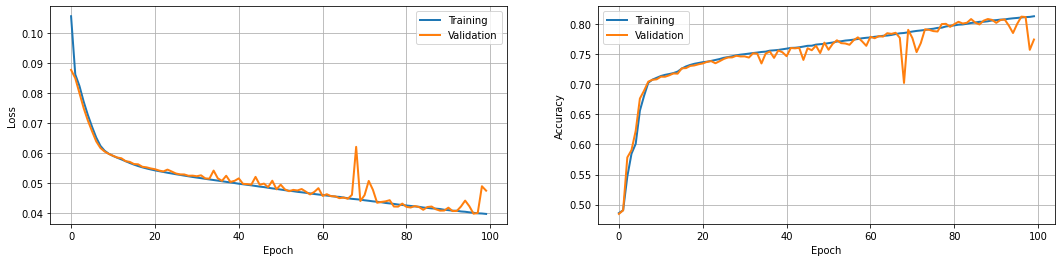

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Save model to disk
DNN.save("mymodel.h5")

# and load it back into memory
from tensorflow.keras.models import load_model
DNN = load_model("mymodel.h5")

In [ ]:
# Compute test loss
test_loss = DNN.evaluate(x=x_test, y=y_test, verbose=False)
test_loss

[0.04656435549259186,
 0.7784413695335388,
 0.04656435549259186,
 0.8175042867660522]

In [ ]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test_hat[:10].round())

(58102, 7)
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1) # Qué argumento me devuelve el valor máximo:= en qué posición del
# vector está el valor de mayor magnitud. 
y_test_cat = np.argmax(y_test, axis=1)

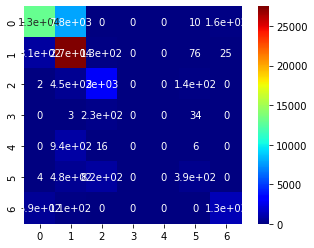

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)

sns.heatmap(Conf_Mat, annot=True, square=True, cmap='jet')
plt.show()

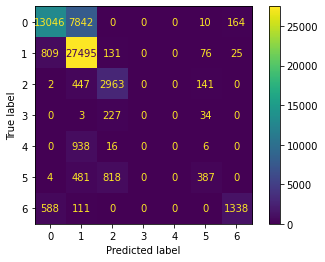

In [ ]:
# Just another way of showing the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_cat, y_test_hat_cat)
plt.show()